In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [27]:
# read mnist data
def read_mnist_images(filename):
    with open(filename, 'rb') as f:
        data = f.read()
        assert int.from_bytes(data[:4], byteorder='big') == 2051
        n_images = int.from_bytes(data[4:8], byteorder='big')
        n_rows = int.from_bytes(data[8:12], byteorder='big')
        n_cols = int.from_bytes(data[12:16], byteorder='big')
        images = np.frombuffer(data, dtype=np.uint8, offset=16).reshape(n_images, n_rows, n_cols)
        return images, n_images


def read_mnist_labels(filename):
    with open(filename, 'rb') as f:
        data = f.read()
        assert int.from_bytes(data[:4], byteorder='big') == 2049
        labels = np.frombuffer(data, dtype=np.uint8, offset=8)
        return labels


x, num_inputs = read_mnist_images('mnist/train-images.idx3-ubyte')
x = x.reshape(-1, 784)
x = x / 255.
y = one_hot_encode(read_mnist_labels('mnist/train-labels.idx1-ubyte'), 10)

In [106]:
w1 = np.random.rand(784, 10) - 0.5 # column per neuron, row per input
b1 = np.zeros((1, 10))
w2 = np.random.rand(10, 10) - 0.5
b2 = np.zeros((1, 10))

In [107]:
def relu(x):
    return np.maximum(0, x)

In [108]:
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [111]:
def forward_propagation(x_batch, y_batch, w1, b1, w2, b2):
    z1 = np.dot(x_batch, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = softmax(z2)
    loss = np.sum(-np.log(a2) * y_batch)
    return z1, a1, z2, a2, loss


def backward_propagation(x_batch, y_batch, z1, a1, a2, w2):
    samples = len(x_batch)
    dZ2 = a2 - y_batch
    dW2 = np.dot(a1.T, dZ2) / samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / samples
    dZ1 = np.dot(dZ2, w2.T) / samples
    dZ1[z1 <= 0] = 0
    dW1 = np.dot(x_batch.T, dZ1) / samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / samples
    return dW1, db1, dW2, db2


def update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, learning_rate):
    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2.reshape(1, -1)
    return w1, b1, w2, b2


def run_network(x, y, w1, b1, w2, b2, learning_rate, epochs, batch_size):
    for i in range(epochs):
        for j in range(0, len(x), batch_size):
            x_batch = x[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            z1, a1, z2, a2, loss = forward_propagation(x_batch, y_batch, w1, b1, w2, b2)
            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch, z1, a1, a2, w2)
            w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, learning_rate)
            accuracy = np.mean(np.argmax(a2, axis=1) == np.argmax(y_batch, axis=1))
        print(f'epoch: {i}, loss: {loss}', f'acc: {accuracy:.3f}')
    return w1, b1, w2, b2

In [112]:
run_network(x, y, w1, b1, w2, b2, 0.1, 100, 60)

epoch: 0, loss: 68.62185684134681 acc: 0.567
epoch: 1, loss: 59.39637096106717 acc: 0.633
epoch: 2, loss: 51.84373862034248 acc: 0.667
epoch: 3, loss: 46.03141379764037 acc: 0.717
epoch: 4, loss: 41.46035877464296 acc: 0.767
epoch: 5, loss: 37.82684784554139 acc: 0.767
epoch: 6, loss: 34.965843232417456 acc: 0.783
epoch: 7, loss: 32.68150227276578 acc: 0.833
epoch: 8, loss: 30.746798050016114 acc: 0.833
epoch: 9, loss: 29.130516186253864 acc: 0.850
epoch: 10, loss: 27.745920228753654 acc: 0.850
epoch: 11, loss: 26.564351500067822 acc: 0.850
epoch: 12, loss: 25.492075590127577 acc: 0.883
epoch: 13, loss: 24.567553706978007 acc: 0.900
epoch: 14, loss: 23.75885541506846 acc: 0.917
epoch: 15, loss: 23.034006104923268 acc: 0.917
epoch: 16, loss: 22.392860634561696 acc: 0.917
epoch: 17, loss: 21.83225351845656 acc: 0.917
epoch: 18, loss: 21.33625148443803 acc: 0.917
epoch: 19, loss: 20.889520643183893 acc: 0.933
epoch: 20, loss: 20.487947262436258 acc: 0.933
epoch: 21, loss: 20.1290319106550

(array([[-0.30568667,  0.08216111,  0.24655292, ..., -0.24389695,
          0.36517454, -0.47602579],
        [-0.37954433,  0.28976872,  0.37714034, ..., -0.28089931,
          0.17805563, -0.27208733],
        [-0.36769763,  0.0375225 , -0.28643863, ...,  0.33290355,
         -0.20914793, -0.28010473],
        ...,
        [ 0.32508396,  0.30507554,  0.15377305, ...,  0.39468545,
          0.07197811, -0.29339456],
        [ 0.36273376,  0.38368134,  0.0333614 , ..., -0.3117535 ,
          0.45396944, -0.03874367],
        [-0.21313943, -0.4697434 , -0.09562315, ...,  0.00748295,
          0.49913972, -0.34847776]]),
 array([[ 0.27953097,  0.43484602,  0.08679978,  0.07027574, -0.09009629,
          0.07789391, -0.19920855,  0.08838469,  0.08312816,  0.06898432]]),
 array([[-0.6326944 ,  0.07711258, -0.90100539,  0.01713515,  1.26211373,
         -0.18753318, -0.89020279,  0.66083651,  0.11662644,  1.19524407],
        [-0.6001226 ,  0.62052728,  0.34386664,  0.4895087 , -0.12442423,

In [38]:
test_sample_num = 9893
x_test, num_inputs = read_mnist_images('mnist/t10k-images.idx3-ubyte')
x_test_flat = x_test.reshape(-1, 784) / 255.
y_test = one_hot_encode(read_mnist_labels('mnist/t10k-labels.idx1-ubyte'), 10)
network.forward_propagation(x_test_flat, y_test)
print(np.argmax(network.layers[-1].output[test_sample_num]))
print(np.argmax(y_test[test_sample_num]))


2
2


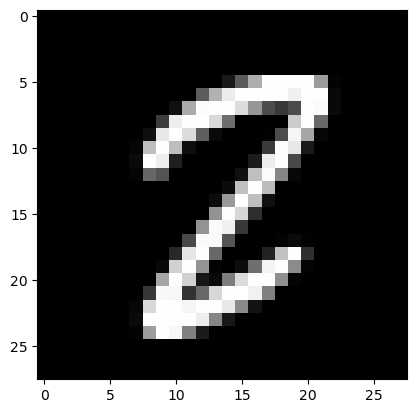

In [39]:
plt.imshow(x_test[9893], cmap='gray')